# **D2APR: Aprendizado de Máquina e Reconhecimento de Padrões** (IFSP, Campinas)

**Created by:**<br>
Vinícius Albano ([@vinialbano](https://github.com/vinialbano)) - CP3013677 <br>
Rodrigo Barros ([@rpbarros](https://github.com/rpbarros)) - CP3013502 <br>
Catia Tondolo  ([@ ](https://github.com/tondoloc)) - CP3013

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.

<span style='font-size: 2.5em'><b>Titanic - Machine Learning from Disaster 🚢</b></span><br/>
<span style='font-size: 1.5em'>Predict survival on the Titanic.</span>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/640px-RMS_Titanic_3.jpg">

---



## 0. Imports and default settings for plotting

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_rows", 150)

sns.set_theme(style="whitegrid")

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

## 🔲 1. Frame the Problem

### 📄 1.1. Context

The sinking of the Titanic is one of the most infamous shipwrecks in history.

RMS Titanic was a British passenger liner operated by the White Star Line. Its construction took about two years and cost 7.5 million dollars. Considering nowdays currency, this value would be approximately [250 billion dolars](https://www.in2013dollars.com/us/inflation/1900?amount=7500000). It was designed to be the safest and most luxurious ship of its age, gaining a reputation for being "unsinkable."

The Titanic launched in 1911 at 269 meters long, 28 meters wide, and 53 meters high, being the largest ship afloat at the time. It operated with a crew of 892 people and could carry up to 2435 passengers (spread across the three available classes).

On April 15, 1912, during its maiden voyage, from Southampton, UK, to New York City, the Titanic sank after colliding with an iceberg. There were not enough lifeboats for everyone on board, resulting in the death of 1502 out of 2224 passengers and crew.

The sinking of the Titanic had as contributing factors natural causes (such as the climate) and human causes (neglect and overconfidence). Regardless of the reasons, the fact is that its wreckage killed fifteen hundreds of people.

Although those who escaped with their lives had their fair share of luck, some groups of people were more likely to escape death than others. For example, women, children and 1st class passengers. Thus, it may be some pattern that can be identified and extract from the raw data.

**References:** <br/>

[Titanic - Wikipedia](https://en.wikipedia.org/wiki/Titanic)

### 🧠 1.2. Challenge

#### 🎯 **Objective:**
**Use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.** <br/>
The usage of this toy problem available on Kaggle allows to study and compare different classification algorithms and ML techniques.

#### **Baseline:**
Many competitors on Kaggle were able to perfectly predict all the passengers that survived. That is the benchmark for this study.

#### **Solution Planning:**
- **Classification problem**
- Metrics:
    - Accuracy
    - Precision
    - Recall
    - F1 Score
    - ROC Curve
    - AUC
- Data sources:
    - [Titanic - Machine Learning from Disaster](https://www.kaggle.com/c/titanic)
- No assumptions
- Project deliverable:
    - A simple exploratory data analysis
    - **A ML system/model** launched in _production_ <br/><br/>

## 💽 2. Get the Data

The considered dataset contains information of 1,309 passengers of the Titanic, including personal (e.g., `Name`, `Sex`, `Age`), and trip-related data (e.g., `Ticket`, `Fare`, `Cabin`). The dataset was previously split into train and test datasets, containing 891 and 418 observations each, respectivelly, where the first indicates if the passenger survived and the second doesn't.

This dataset does not have legal obligations and sensitive information.

### 2.1. Download the Data

Titanic dataset is available at this [Kaggle repository](https://www.kaggle.com/c/titanic).

### 2.2. Load the Data

In [2]:
import pandas as pd
df_train = pd.read_csv('./datasets/train.csv')
df_test = pd.read_csv('./datasets/test.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2.3. Take a quick look at the data structure

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Each row corresponds to a passenger on Titanic that may have survived or not.

Each passenger is represented by **12 attributes** (5 numeric and 7 categorical).

* `PassengerId`: a unique identifier.
* `Survived`: Survival (0 = No, 1 = Yes) - ***only in the train dataset***.
* `Pclass`: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd).
* `Name`: The name of the passenger.
* `Sex`: The sex of the passenger.
* `Age`: Age of the passenger in years.
* `SibSp`: Number of siblings / spouses aboard the Titanic.
* `Parch`: Number of parents / children aboard the Titanic.dd
* `Ticket`: Ticket number.
* `Fare`: Passenger fare.
* `Cabin`: Cabin number.
* `Embarked`: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

There are **891 instances** in the **train** dataset, with the following **missing features**:
* `Age` - missing in around 20% of the instances.
* `Cabin` - missing in around 77% of the instances.
* `Embarked` - missing 2 observations.

There are **418 instances** in the **test** dataset, with the following **missing features**:
* `Age` - missing in around 20% of the instances.
* `Cabin` - missing in around 78% of the instances.
* `Fare` - missing 1 observation. 

Since the **test** dataset should remain untouched, no information will be get from it.

Each row corresponds to a passenger on Titanic that may have survived or not.

Each passenger is represented by **12 attributes** (5 numeric and 7 categorical).

<table style="border-collapse: collapse;font-size: 14px; width:700px;">
  <tr>
    <th style="background-color:#D3DBDD;">Feature</th>
    <th style="width:500px; background-color:#D3DBDD;">Description</th>
    <th style="background-color:#D3DBDD;">Type</th>
  </tr>
  <tr>
    <td>Passengerid</td>
    <td>Passenger identification number</td>
    <td>Numeric</td>
  </tr>    
  <tr>
    <td>Survival</td>
    <td>Did Survive the incident?</td>
    <td>Categorical</td>
  </tr>
  <tr>
    <td>Pclass </td>
    <td>Class of passenger</td>
    <td>Categorical</td>
  </tr>
  <tr>
    <td>Name</td>
    <td>Passenger´s name, includes passenger´s title</td>
    <td>Categorical</td>
  </tr>
  <tr>
    <td>Sex </td>
    <td>Gender</td>
    <td>Categorical</td>
  </tr>
  <tr>
    <td>Age </td>
    <td>Age of the passenger</td>
    <td>Numeric</td>
  </tr>
  <tr>
    <td>Sibsp </td>
    <td>No of siblings / spouses aboard the Titanic</td>
    <td>Numeric</td>
  </tr>
  <tr>
    <td>Parch</td>
    <td>No of parents / children aboard the Titanic</td>
    <td>Numeric</td>
  </tr>
  <tr>
    <td>Ticket</td>
    <td>Unique ticket number</td>
    <td>Categorical</td>
  </tr>
  <tr>
    <td>Fare</td>
    <td>Passenger fare</td>
    <td>Numeric</td>
  </tr>
  <tr>
    <td>Cabin</td>
    <td>Cabin number</td>
    <td>Categorical</td>
  </tr>
  <tr>
    <td>Embarked</td>
    <td>Boarding Port</td>
    <td>Categorical</td>
  </tr>
</table>

There are **891 instances** in the **train** dataset, with the following **missing features**:
* `Age` - missing in around 20% of the instances.
* `Cabin` - missing in around 77% of the instances.
* `Embarked` - missing 2 observations.

There are **418 instances** in the **test** dataset, with the following **missing features**:
* `Age` - missing in around 20% of the instances.
* `Cabin` - missing in around 78% of the instances.
* `Fare` - missing 1 observation. 

Since the **test** dataset should remain untouched, no information will be get from it.

In [6]:
# Fixing wrong data types
df_train['Survived'] = df_train['Survived'].astype('bool')

In [7]:
df_train.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df_train.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"McGowan, Miss. Anna ""Annie""",male,347082,G6,S
freq,1,577,7,4,644


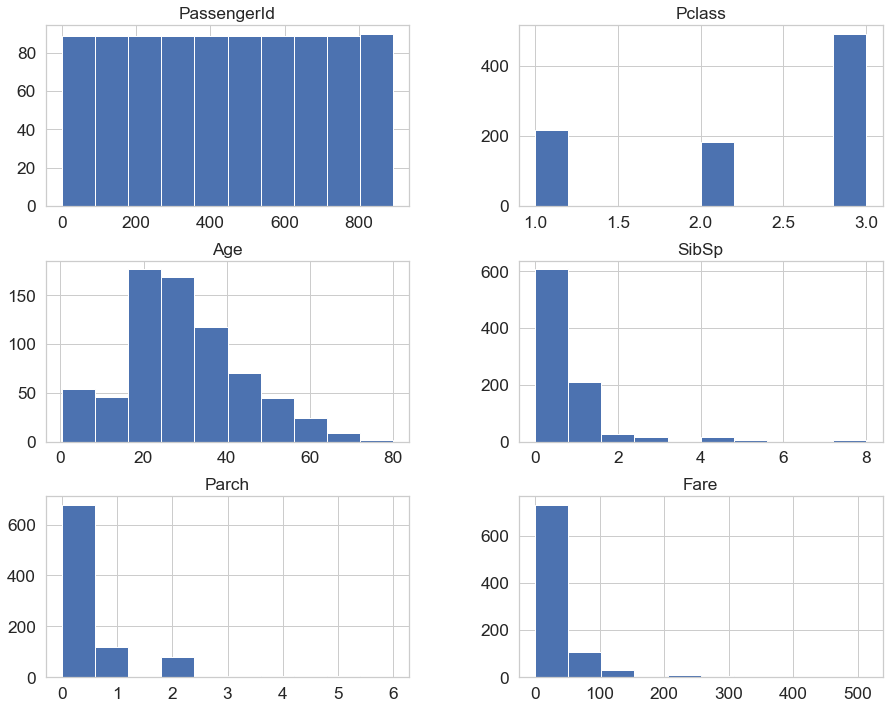

In [9]:
# plot a histogram for each numeric attribute from the database
df_train.hist(figsize=(15,12))
display()

**What was learned so far:**

* There were almost twice as many passengers in the 3rd class as 1st class or 2nd class.

* Most of the passengers were in their 20s or 30s. There were some children and number of people substancially decreases above 50s.

* The majority of the passengers had no siblings/spouses/children/parents on board. However, there were also families with more than 8 relatives on the Titanic.

* 75% of the travelers had paid up to 31 USD for the trip. However, there were some very expensive cabins, up to a maximum of 512 USD which corresponds to aproximatelly [17,000 USD nowdays](https://www.in2013dollars.com/us/inflation/1900?amount=512).

* There are no outstanding ouliers on this dataset.

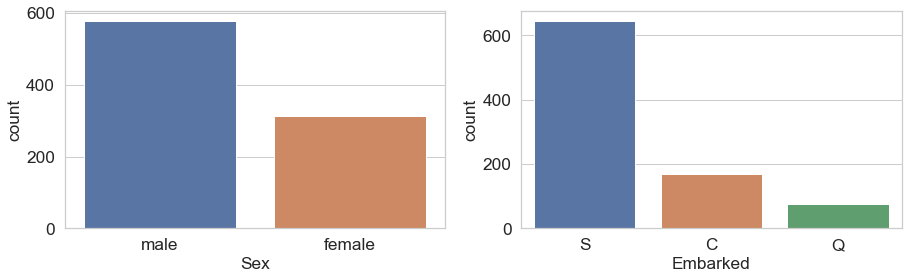

In [10]:
# Checking the distribution of Sex and Embarked
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,4))

sns.countplot(x='Sex', data=df_train, ax=ax1)
sns.countplot(x='Embarked', data=df_train, ax=ax2)
display()

As there are around 20% of missing data in the `Age` attribute, It is worth to check how this information influences the chance of survival before cleaning the data.

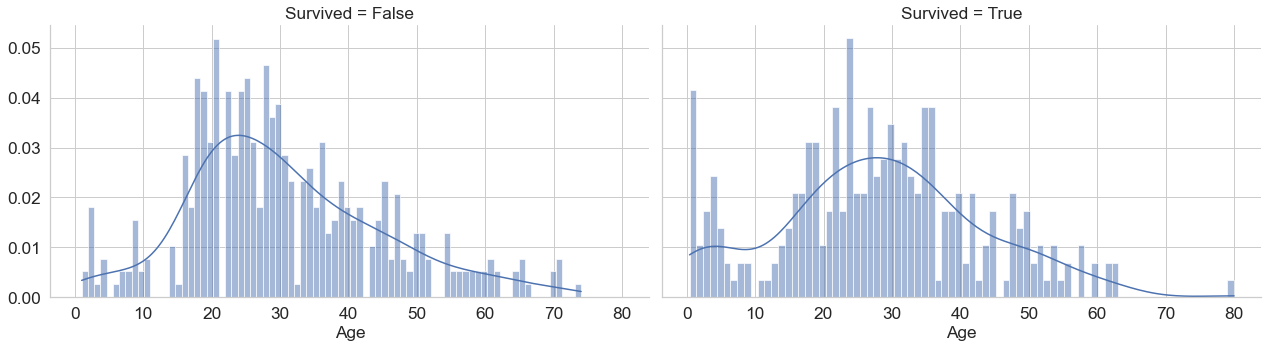

In [11]:
# Checking influence of age on the probability of survival
age_survived = sns.FacetGrid(df_train, col='Survived', height=5, aspect=16/9)
age_survived.map(sns.histplot, 'Age', stat='density', kde=True, bins=80)
display()

From the histograms above, the survivability is similar and seems to be independent of age. However, there is a peak of survivors of age close to zero. <br>
An insight seems to be that young kids had a priority to enter the safeboats.

### 2.4. Checking for duplicated samples

In [12]:
df_train.duplicated().any()

False

There are no duplicated samples (rows) on this dataset.

## 🧹 3. Data Cleaning

In [13]:
df_train_clean = df_train.copy()

In [14]:
df_train_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,False,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 3.1. Fixing missing values

As checked in the dataset description, the `Age`, `Cabin` and `Embarked` attributes have missing data.

It is worth to check some samples.

#### 3.1.1. `Age`

In [15]:
missing_age = df_train_clean.query('Age.isna()')
missing_age_idx = missing_age.index
missing_age.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,False,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,True,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,True,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,False,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,True,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


Since `Pclass` and `Sex` influence `Age`, a good strategy is to find the median/mean age in a group of passengers and add to the missing observations.

To achieve this goal, a transformer can be used.

In [16]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted

class GroupMissingImputer(BaseEstimator, TransformerMixin):
    def __init__(self, group_cols, target, metric='mean'):
        assert metric in ['mean', 'median'], 'Unrecognized value for metric, should be mean/median'
        assert type(group_cols) == list, 'group_cols should be a list of columns'
        assert type(target) == str, 'target should be a string'
        super().__init__()
        
        self.group_cols = group_cols
        self.target = target
        self.metric = metric
    
    def fit(self, X, y=None):
        assert pd.isnull(X.loc[:, self.group_cols]).any(axis=None) == False, 'There are missing values in group_cols'
        impute_map = X.groupby(self.group_cols)[self.target].agg(self.metric).reset_index(drop=False)
        self.impute_map_ = impute_map
        
        return self 
    
    def transform(self, X, y=None):
        # make sure that the imputer was fitted
        check_is_fitted(self, 'impute_map_')
        X = X.copy()
        for index, row in self.impute_map_.iterrows():
            ind = (X[self.group_cols] == row[self.group_cols]).all(axis=1)
            attribute = X.loc[ind, self.target]
            mask = np.isnan(attribute)
            X.loc[ind, self.target] = X.loc[ind, self.target].mask(mask, row[self.target])
        
        return X

In [17]:
df_train_clean = GroupMissingImputer(group_cols=['Pclass','Sex'], target='Age', metric='median').fit_transform(df_train_clean)
df_train_clean.loc[missing_age_idx].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,False,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,NaN,Q
17,18,True,2,"Williams, Mr. Charles Eugene",male,30.0,0,0,244373,13.0000,NaN,S
19,20,True,3,"Masselmani, Mrs. Fatima",female,21.5,0,0,2649,7.2250,NaN,C
26,27,False,3,"Emir, Mr. Farred Chehab",male,25.0,0,0,2631,7.2250,NaN,C
28,29,True,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,21.5,0,0,330959,7.8792,NaN,Q


#### 3.1.2 `Cabin`

The Cabin attribute, seems to be missing most of the observations. It's hard to impute a value based on the other available samples. An approach is to add a missing field category.

In [18]:
missing_cabin = df_train_clean[df_train_clean['Cabin'].isna()]
missing_cabin_idx = missing_cabin.index
missing_cabin.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,False,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,False,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,NaN,Q
7,8,False,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


With the insights above, a transformer is created to impute a constant value.

In [19]:
class ConstantImputer(BaseEstimator, TransformerMixin):
    def __init__(self, target, value):
        assert type(target) == str, 'target should be a string'
        super().__init__()
        self.target = target
        self.value = value
    
    def fit(self, X, y=None):
        return self 
    
    def transform(self, X, y=None):
        X = X.copy()
        X[self.target] = X[self.target].fillna(self.value)
        
        return X

In [20]:
df_train_clean = ConstantImputer(target='Cabin', value='U').fit_transform(df_train_clean)
df_train_clean.loc[missing_cabin_idx].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S
4,5,False,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S
5,6,False,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,U,Q
7,8,False,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,U,S


One important information that may be hidden on Cabin feature is the Deck in which the passenger was located. This may also have influence on the survival rate given the distance / escape routes.
An interesting approach was found on a [Kaggle notebook](https://www.kaggle.com/gunesevitan/titanic-advanced-feature-engineering-tutorial#).
The first letter on Cabin feature indicates the Deck that the Cabin is located.
![alt text](https://vignette.wikia.nocookie.net/titanic/images/f/f9/Titanic_side_plan.png/revision/latest?cb=20180322183733)
* Is it known that Boat Deck includes letters from **T-Z** cabins but only **T** cabins are present in the dataset.
* **A**, **B** and **C** decks were only for 1st class passengers. Also, these decks were served by elevators.
* **D** and **E** decks were for all classes.
* **F** and **G** decks were for both 2nd and 3rd class passengers.
* From **A** to **G**, distance to the Boat Deck increases which might be a factor of survival.

It is also noticiable that a higher number of life saving boats were located on the front side of Titanic.
![alt text](https://upload.wikimedia.org/wikipedia/commons/7/70/Titanic_lifeboats_on_boat_deck_plan.jpg)

By inspecting cabin locations, it is also noticiable that 1st-class cabins and dedicated rooms were located on a upper level, sligthly situated on the front portion of the ship.
![alt text](https://images.twinkl.co.uk/tw1n/image/private/t_630_eco/website/uploaded/t-t-9758b-the-titanic-cross-section-poster-a4-1554306892.png)



#### 3.1.3. `Embarked`

Since most of the passengers embarked on the port of Southampton, this value will be added to the missing observations.

In [21]:
missing_embarked = df_train_clean[df_train_clean['Embarked'].isna()]
missing_embarked_idx = missing_embarked.index
missing_embarked.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,True,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,True,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


To solve this problem, a transformer is created to impute the most common value of an attribute.

In [22]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted

class ModeImputer(BaseEstimator, TransformerMixin):
    def __init__(self, target):
        assert type(target) == str, 'target should be a string'
        super().__init__()
        self.target = target
    
    def fit(self, X, y=None):
        impute_value = X[self.target].agg(pd.Series.mode).iloc[0]
        self.impute_value_ = impute_value
        
        return self 
    
    def transform(self, X, y=None):
        # make sure that the imputer was fitted
        check_is_fitted(self, 'impute_value_')
        X = X.copy()
        X[self.target] = X[self.target].fillna(self.impute_value_)
        
        return X

In [23]:
df_train_clean = ModeImputer(target='Embarked').fit_transform(df_train_clean)
df_train_clean.loc[missing_embarked_idx]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,True,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,S
829,830,True,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,S


### 3.2. Saving the Dataset

In [24]:
df_train_clean.to_csv('./datasets/train_clean.csv', index=False)

## 📊 4. Explore the Data
As a next step, a _simple exploratory data analysis (EDA)_ is performed in order to gain insights about the data. <br/>
A more complete EDA with hypothesis about the problem should be further elaborated. 

In [25]:
# reload the cleaned training set
df_train = pd.read_csv('./datasets/train_clean.csv')

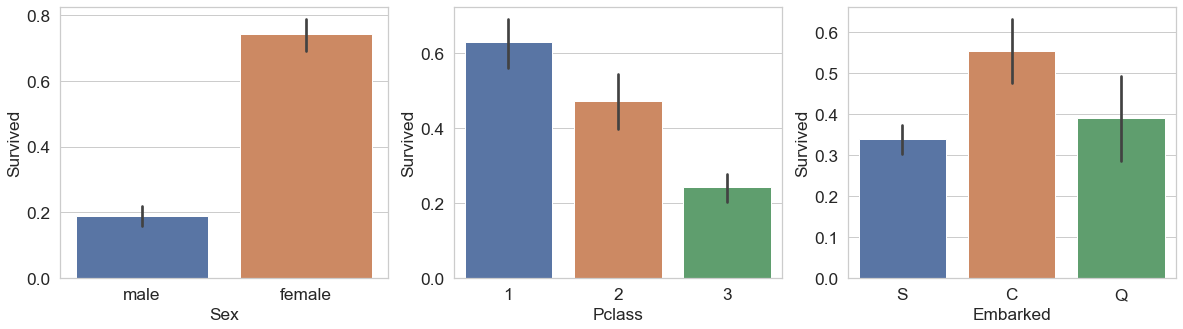

In [26]:
# Checking the proportion of survivors among different categorical attributes
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,5))

sns.barplot(x='Sex', y='Survived', data=df_train, ax=ax1)
sns.barplot(x='Pclass', y='Survived', data=df_train, ax=ax2)
sns.barplot(x='Embarked', y='Survived', data=df_train, ax=ax3)
display()

* The chance of a woman surviving were much higher than a man (approximately 75% vs. 18%).

* 1st-class passengers had more than twice the chance of escaping the tragedy than the 3rd-class ones.

* Passengers that embarked on the port of Cherbourg had the most survivability, while the ones that launched in Southampton had a smaller chance. The reason for this difference is not clear, but can be related to the fact that [wealthier passengers boarded at Cherbourg](https://www.irishcentral.com/roots/history/on-this-day-titanic-sets-sail-southampton-cherbourg-france) which indicates that most likely they were 1st class passengers. <br>
There may be a correlation between the `Pclass` and `Embarked` features to corroborate this information.

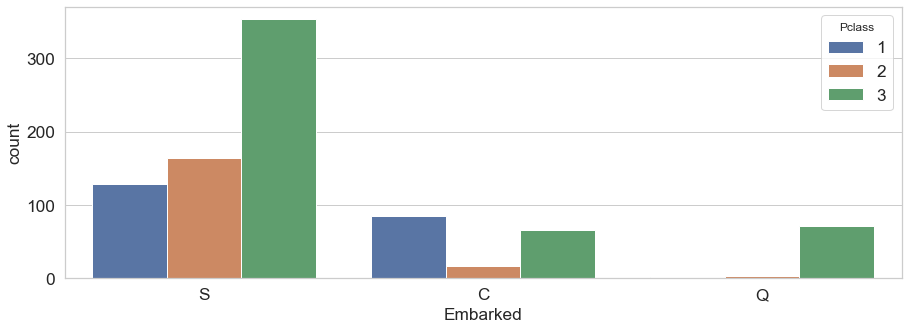

In [27]:
# Checking the distribution of Pclass among the different ports
sns.countplot(x='Embarked', hue='Pclass', data=df_train)
display()

The information seems to hold correct. The proportion of 1st-class and 3rd-class passengers is very different between the ports. <br>
While in Southampton there were almost a ratio of 1:3, in Cherbourg there are more 1st-class than 3rd-class passengers.

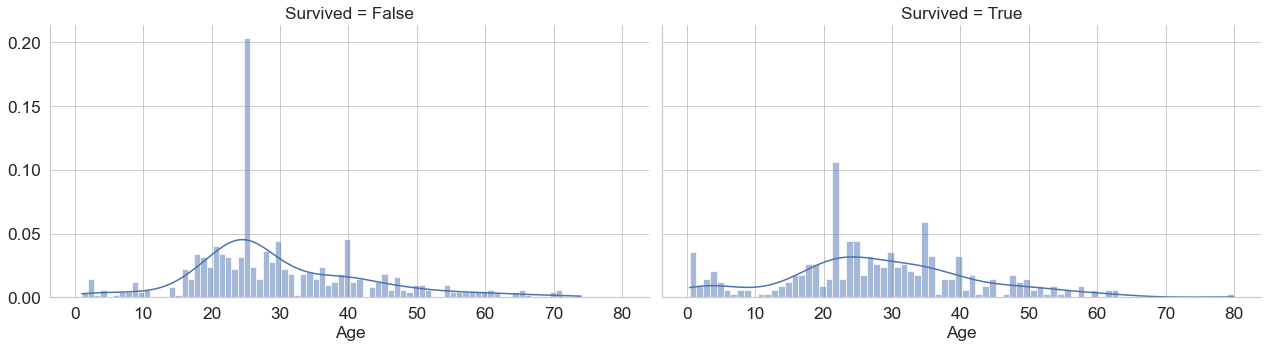

In [28]:
# Checking influence of age on the probability of survival
age_survived = sns.FacetGrid(df_train, col='Survived', height=5, aspect=16/9)
age_survived.map(sns.histplot, 'Age', stat='density', kde=True, bins=80)
display()

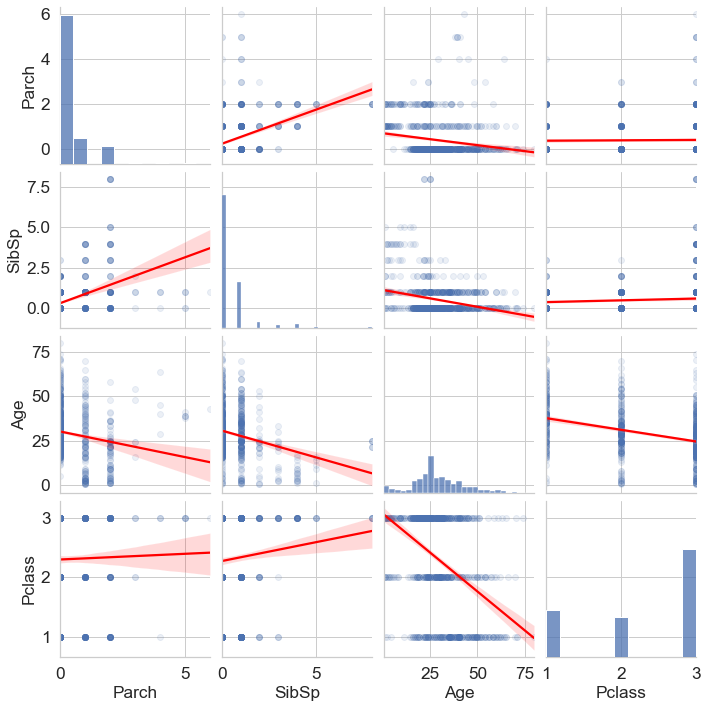

In [29]:
columns=['Parch', 'SibSp', 'Age', 'Pclass']
sns.pairplot(df_train[columns],kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})
display()

* It seems that the oldest passengers are concentrated in the 1st-class and the youngest are on 3rd-class.

* 1st-class passengers also tend to have more siblings/spouses on board.

### 4.2. Looking for Correlations

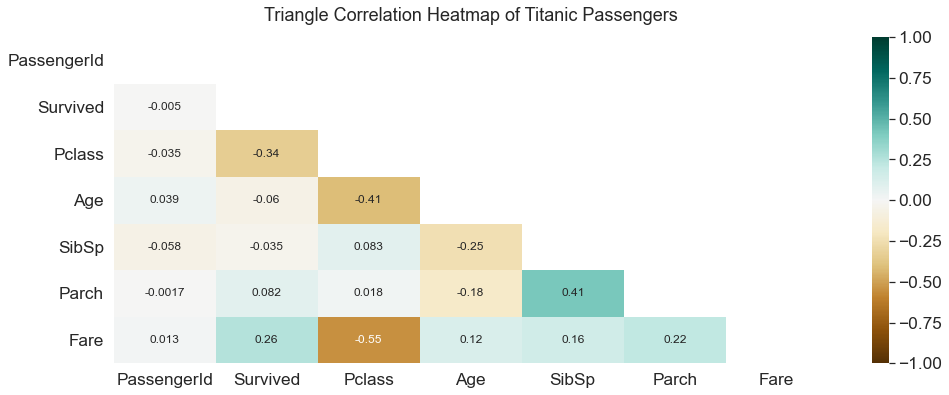

In [30]:
# plotting the correlation coeficients as a heatmap
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df_train.corr(), dtype='bool'))  # creates a triangular matrix based on the pandas correlation matrix

heatmap = sns.heatmap(df_train.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap of Titanic Passengers', fontdict={'fontsize':18}, pad=16);

In [31]:
df_train.corr()["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.059579
Pclass        -0.338481
Name: Survived, dtype: float64

In [32]:
# including the Sex and Embarked values
dummy_df_train = pd.get_dummies(df_train, columns=['Sex', 'Embarked'])
dummy_df_train.corr()["Survived"].sort_values(ascending=False)

Survived       1.000000
Sex_female     0.543351
Fare           0.257307
Embarked_C     0.168240
Parch          0.081629
Embarked_Q     0.003650
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.059579
Embarked_S    -0.149683
Pclass        -0.338481
Sex_male      -0.543351
Name: Survived, dtype: float64

The _most promising attribute_ to predict the `Survived` is the `Sex`, followed by `Pclass` and `Fare`

### 4.3. Data distribution

In [33]:
numeric_attributes = df_train.select_dtypes(include='number').columns
numeric_attributes

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

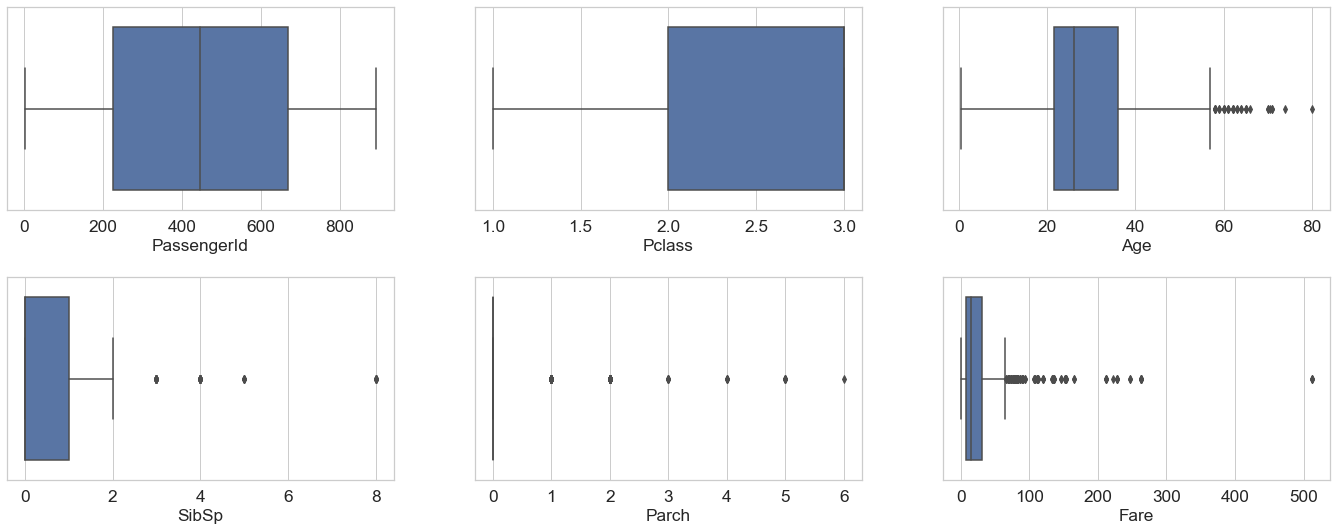

In [34]:
fig, axes = plt.subplots(2, 3, figsize=(20, 8))
fig.tight_layout(pad=3.0)

for i, attr in enumerate(numeric_attributes):
    row = i // 3
    col = i % 3
    sns.boxplot(data=df_train, x=attr, ax=axes[row, col])

All the attributes have many _outliers_. However, those **will not** be removed them because _they do not seem to be noise_.

## 🛠️ 5. Prepare the Data (Preprocessing)

In [35]:
# load the cleaned training set
df_train = pd.read_csv('./datasets/train_clean.csv')

### 5.1. Feature Engineering

Before prepare the model, it is worth to explore some new features, based on what was learned for far.

A great strategy is trying to create new features from the most promising ones that were found before.

- `Sex`
- `Pclass`
- `Fare`

#### Summarizing discoveries

### 5.2. Removing attributes that are not used

Let's get rid of some attributes that won't be used on the model. For that, a transformer is created.

In [36]:
class AttributesRemovalTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, cols):
        assert type(cols) == list, 'cols should be a list of columns'
        super().__init__()
        
        self.cols = cols
        pass
    
    def fit(self, X, y=None):
        return self  # nothing else to do
    
    def transform(self, X):
        X = X.copy()
        
        # removing the useless features
        X = X.drop(self.cols, axis=1)
        
        return X

In [37]:
df_train = AttributesRemovalTransformer(['PassengerId', 'Name', 'Ticket', 'Cabin']).fit_transform(df_train)
df_train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

### 5.4. Separating the independent variables (features) and the dependent variable (target outcome)

In [38]:
df_train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [39]:
# store the target outcome into a numpy array
y_train = df_train['Survived']

In [40]:
# overwrite the dataframe with only the features  
df_train = df_train.drop(columns=['Survived'])

### 5.5. Separate the _numerical_ and _categorical_ features
As different preprocessing tasks (transformations) were performed, to _numerical_ features and _categorical_ ones, it makes sense to split dataset into two different dataframes.

For that, new transformers are create in order to automate the process.<br>
Also, Pandas DataFrame is also transformed to a Numpy Array, in order to use ScikitLearn transformers.

In [41]:
class NumericalTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, numerical_cols):    
        super().__init__()
        
        self.numerical_cols = numerical_cols

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        # Numerical features to pass down the numerical pipeline
        X = X[self.numerical_cols]
        X = X.replace([np.inf, -np.inf], np.nan)
        return X.values

In [42]:
num_attributes = list(df_train.select_dtypes(include='number').columns)
num_attributes

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [43]:
X_train_num =  NumericalTransformer(num_attributes).fit_transform(df_train)
X_train_num

array([[ 3.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 3.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 3.    , 21.5   ,  1.    ,  2.    , 23.45  ],
       [ 1.    , 26.    ,  0.    ,  0.    , 30.    ],
       [ 3.    , 32.    ,  0.    ,  0.    ,  7.75  ]])

In [44]:
class CategoricalTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, categorical_cols):
        super().__init__()
        
        self.categorical_cols = categorical_cols

    # Return self nothing else to do here
    def fit(self, X, y=None):
        return self

    # Transformer method for this transformer
    def transform(self, X, y=None):
        # Categorical features to pass down the categorical pipeline
        return X[self.categorical_cols].values

In [45]:
cat_attributes = list(df_train.select_dtypes(exclude='number').columns)
cat_attributes

['Sex', 'Embarked']

In [46]:
X_train_cat = CategoricalTransformer(cat_attributes).fit_transform(df_train)
X_train_cat

array([['male', 'S'],
       ['female', 'C'],
       ['female', 'S'],
       ...,
       ['female', 'S'],
       ['male', 'C'],
       ['male', 'Q']], dtype=object)

### 5.6. Feature Scaling

In order to scale the features, a RobustScaler from ScikitLearn is used.

In [47]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train_num_scaled = scaler.fit_transform(X_train_num)
X_train_num_scaled

array([[ 0.        , -0.27586207,  1.        ,  0.        , -0.3120106 ],
       [-2.        ,  0.82758621,  1.        ,  0.        ,  2.46124229],
       [ 0.        ,  0.        ,  0.        ,  0.        , -0.28277666],
       ...,
       [ 0.        , -0.31034483,  1.        ,  2.        ,  0.38960398],
       [-2.        ,  0.        ,  0.        ,  0.        ,  0.67328148],
       [ 0.        ,  0.4137931 ,  0.        ,  0.        , -0.29035583]])

### 5.7. Categorical Variable Encoding

Categorical variables are transformed into numerical ones by using OneHotEncoder from ScikitLearn.

In [48]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')

X_train_cat_1hot = encoder.fit_transform(X_train_cat)
X_train_cat_1hot.toarray()

array([[0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0.]])

In [49]:
encoder.categories_

[array(['female', 'male'], dtype=object), array(['C', 'Q', 'S'], dtype=object)]

### 5.8 PolynomialFeatures

In order to create a non-linear model, correlation between the variables is explored using the PolynomialFeatures transformer from ScikitLearn.

**⚠️ Warning:** this transformer *must* be used before the FeatureScaling in the Pipeline, so the PolynomialFeatures increase signal before scaling.


In [50]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_transformer = PolynomialFeatures(include_bias=False, interaction_only=True)

X_train_num_poly = polynomial_transformer.fit_transform(X_train_num)
X_train_num_poly

array([[ 3.    , 22.    ,  1.    , ...,  0.    ,  7.25  ,  0.    ],
       [ 1.    , 38.    ,  1.    , ...,  0.    , 71.2833,  0.    ],
       [ 3.    , 26.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
       ...,
       [ 3.    , 21.5   ,  1.    , ...,  2.    , 23.45  , 46.9   ],
       [ 1.    , 26.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
       [ 3.    , 32.    ,  0.    , ...,  0.    ,  0.    ,  0.    ]])

In [51]:
X_train_num_poly.shape

(891, 15)

### 5.9. Preprocessing Pipelines

For automating the whole preprocessing phase, let's build a preprocessing pipeline.

In [52]:
from sklearn.pipeline import Pipeline, FeatureUnion

#### Pipeline for feature engineering

In [53]:
features_pipeline = Pipeline([
    ('age_imputer', GroupMissingImputer(
        group_cols=['Pclass','Sex'],
        target='Age',
        metric='median')),
    ('cabin_imputer', ConstantImputer(
        target='Cabin',
        value='U')),
    ('embarked_imputer', ModeImputer(
        target='Embarked')),
    ('feats_remover', AttributesRemovalTransformer(
        ['PassengerId', 'Name', 'Ticket', 'Cabin']))
])

#### Pipeline for numerical data

In [54]:
from sklearn.impute import SimpleImputer

numerical_pipeline = Pipeline([
    ('num_transformer', NumericalTransformer(num_attributes)),
    ('imputer', SimpleImputer()),
    ('poly_feat_transformer', PolynomialFeatures(include_bias=False)),
    ('robust_scaler', RobustScaler())
])

A SimpleImputer is included to handle the missing `Fare` attribute in the test set.

#### Pipeline for categorical data

In [55]:
categorical_pipeline = Pipeline([
    ('cat_transformer', CategoricalTransformer(cat_attributes)),
    ('one_hot_encoder', OneHotEncoder(sparse=False))
])

#### Union Pipeline

In [56]:
union_pipeline = FeatureUnion([
    ('numerical_pipeline', numerical_pipeline),
    ('categorical_pipeline', categorical_pipeline)
])

#### Full Preprocessing Pipeline

In [57]:
preprocessing_pipeline = Pipeline([
    ('features_pipeline', features_pipeline),
    ('union_pipeline', union_pipeline),
])

In [58]:
# reload the cleaned training set
df_train_clean = pd.read_csv('./datasets/train_clean.csv')

df_train_pre_npy = preprocessing_pipeline.fit_transform(df_train_clean)

#### Full Pipeline with Model Training/Prediction

In [59]:
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

full_pipeline_lin = Pipeline([
        ('preprocessing', preprocessing_pipeline),
        ('lin_classifier', RidgeClassifier())
])

full_pipeline_tree = Pipeline([
        ('preprocessing', preprocessing_pipeline),
        ('tree_classifier', DecisionTreeClassifier(random_state=27))
])


full_pipeline_kn = Pipeline([
        ('preprocessing', preprocessing_pipeline),
        ('kn_classifier', KNeighborsClassifier(n_neighbors=5))
])


full_pipeline_svm = Pipeline([
        ('preprocessing', preprocessing_pipeline),
        ('svm_classifier', svm.SVC())
])

### 5.10. Saving the Pipelines

In [60]:
import joblib

joblib.dump(preprocessing_pipeline, './models/preprocessing_pipeline.pkl')
joblib.dump(full_pipeline_lin, './models/full_pipeline_lin.pkl')
joblib.dump(full_pipeline_tree, './models/full_pipeline_tree.pkl')
joblib.dump(full_pipeline_kn, './models/full_pipeline_kn.pkl')
joblib.dump(full_pipeline_svm, './models/full_pipeline_svm.pkl')

['./models/full_pipeline_svm.pkl']

### 5.11. Saving the Preprocessed Training Set

In [61]:
np.save('./datasets/train_pre_numpy.npy', df_train_pre_npy)

## 🏋️‍♀️ 6. Train ML Algorithms

### 6.1. Getting the independent (features) and dependent variables (outcome)

In [62]:
X_train = df_train_pre_npy
# The y_train is already available.

In [63]:
X_train.shape

(891, 25)

In [64]:
y_train.shape

(891,)

### 6.2. Grid-Search (fine-tunning)

#### Linear Classifier

##### **Finding out the hyperparameter key names**

In [65]:
full_pipeline_lin.get_params()

{'memory': None,
 'steps': [('preprocessing',
   Pipeline(steps=[('features_pipeline',
                    Pipeline(steps=[('age_imputer',
                                     GroupMissingImputer(group_cols=['Pclass',
                                                                     'Sex'],
                                                         metric='median',
                                                         target='Age')),
                                    ('cabin_imputer',
                                     ConstantImputer(target='Cabin', value='U')),
                                    ('embarked_imputer',
                                     ModeImputer(target='Embarked')),
                                    ('feats_remover',
                                     AttributesRemovalTransformer(cols=['PassengerId',
                                                                        'Name',
                                                                        'T

##### **Grid-search**

In [66]:
from sklearn.model_selection import GridSearchCV

# search space
param_grid_lin = [
    {
    'preprocessing__features_pipeline__age_imputer__metric': ['mean', 'median'],
    'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__degree': [1, 2, 3],
    'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__include_bias': [True, False],
    'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__interaction_only': [True, False],
    }
]

grid_search_lin = GridSearchCV(full_pipeline_lin, param_grid_lin, cv=5, scoring='f1', return_train_score=True, verbose=1)
grid_search_lin.fit(df_train_clean, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        Pipeline(steps=[('features_pipeline',
                                                         Pipeline(steps=[('age_imputer',
                                                                          GroupMissingImputer(group_cols=['Pclass',
                                                                                                          'Sex'],
                                                                                              metric='median',
                                                                                              target='Age')),
                                                                         ('cabin_imputer',
                                                                          ConstantImputer(target='Cabin',
                                                                                          value='U')),
      

In [67]:
cvres = grid_search_lin.cv_results_

# (approximated) RMSE
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.7222544861880291 {'preprocessing__features_pipeline__age_imputer__metric': 'mean', 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__degree': 1, 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__include_bias': True, 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__interaction_only': True}
0.7222544861880291 {'preprocessing__features_pipeline__age_imputer__metric': 'mean', 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__degree': 1, 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__include_bias': True, 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__interaction_only': False}
0.7222544861880291 {'preprocessing__features_pipeline__age_imputer__metric': 'mean', 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__degree': 1, 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__include_bias': F

In [68]:
# best params
grid_search_lin.best_params_

{'preprocessing__features_pipeline__age_imputer__metric': 'mean',
 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__degree': 2,
 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__include_bias': True,
 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__interaction_only': False}

In [69]:
# get the approximated RMSE and its standard deviation
best_index = grid_search_lin.best_index_
best_score = grid_search_lin.cv_results_['mean_test_score'][best_index]
best_score_std = grid_search_lin.cv_results_['std_test_score'][best_index]

print(f'Best score: {best_score} +- {best_score_std}')

Best score: 0.7438056696060028 +- 0.03526776657350073


#### Decision Tree Classifier

##### **Finding out the hyperparameter key names**

In [70]:
full_pipeline_tree.get_params()

{'memory': None,
 'steps': [('preprocessing',
   Pipeline(steps=[('features_pipeline',
                    Pipeline(steps=[('age_imputer',
                                     GroupMissingImputer(group_cols=['Pclass',
                                                                     'Sex'],
                                                         metric='median',
                                                         target='Age')),
                                    ('cabin_imputer',
                                     ConstantImputer(target='Cabin', value='U')),
                                    ('embarked_imputer',
                                     ModeImputer(target='Embarked')),
                                    ('feats_remover',
                                     AttributesRemovalTransformer(cols=['PassengerId',
                                                                        'Name',
                                                                        'T

##### **Grid-search**

In [71]:
# search space
param_grid_tree = [
    {
    'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__degree': [1, 2, 3],
    'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__interaction_only': [True, False],
    'tree_classifier__min_samples_split': [3, 4]
    }
]

grid_search_tree = GridSearchCV(full_pipeline_tree, param_grid_tree, cv=5, scoring='f1', return_train_score=True, verbose=1)
grid_search_tree.fit(df_train_clean, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        Pipeline(steps=[('features_pipeline',
                                                         Pipeline(steps=[('age_imputer',
                                                                          GroupMissingImputer(group_cols=['Pclass',
                                                                                                          'Sex'],
                                                                                              metric='median',
                                                                                              target='Age')),
                                                                         ('cabin_imputer',
                                                                          ConstantImputer(target='Cabin',
                                                                                          value='U')),
      

In [72]:
cvres = grid_search_tree.cv_results_

# (approximated) RMSE
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.7150860556833719 {'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__degree': 1, 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__interaction_only': True, 'tree_classifier__min_samples_split': 3}
0.7187185921668401 {'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__degree': 1, 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__interaction_only': True, 'tree_classifier__min_samples_split': 4}
0.7150860556833719 {'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__degree': 1, 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__interaction_only': False, 'tree_classifier__min_samples_split': 3}
0.7187185921668401 {'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__degree': 1, 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__interaction_only': False, 'tree_classifier__min_samples_split': 4}
0.7179

In [73]:
# best params
grid_search_tree.best_params_

{'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__degree': 1,
 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__interaction_only': True,
 'tree_classifier__min_samples_split': 4}

In [74]:
# get the approximated RMSE and its standard deviation
best_index = grid_search_tree.best_index_
best_score = grid_search_tree.cv_results_['mean_test_score'][best_index]
best_score_std = grid_search_tree.cv_results_['std_test_score'][best_index]

print(f'Best score: {best_score} +- {best_score_std}')

Best score: 0.7187185921668401 +- 0.044953610642715795


#### KNeighbors Regression

##### **Finding out the hyperparameter key names**

In [75]:
full_pipeline_kn.get_params()

{'memory': None,
 'steps': [('preprocessing',
   Pipeline(steps=[('features_pipeline',
                    Pipeline(steps=[('age_imputer',
                                     GroupMissingImputer(group_cols=['Pclass',
                                                                     'Sex'],
                                                         metric='median',
                                                         target='Age')),
                                    ('cabin_imputer',
                                     ConstantImputer(target='Cabin', value='U')),
                                    ('embarked_imputer',
                                     ModeImputer(target='Embarked')),
                                    ('feats_remover',
                                     AttributesRemovalTransformer(cols=['PassengerId',
                                                                        'Name',
                                                                        'T

##### **Grid-search**

In [76]:
# search space
param_grid_kn = [
    {
    'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__degree': [1, 2, 3],
    'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__interaction_only': [True, False],
    'kn_classifier__n_neighbors': [5, 7, 11]
    }
]

grid_search_kn = GridSearchCV(full_pipeline_kn, param_grid_kn, cv=5, scoring='f1', return_train_score=True, verbose=1)
grid_search_kn.fit(df_train_clean, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        Pipeline(steps=[('features_pipeline',
                                                         Pipeline(steps=[('age_imputer',
                                                                          GroupMissingImputer(group_cols=['Pclass',
                                                                                                          'Sex'],
                                                                                              metric='median',
                                                                                              target='Age')),
                                                                         ('cabin_imputer',
                                                                          ConstantImputer(target='Cabin',
                                                                                          value='U')),
      

In [77]:
cvres = grid_search_kn.cv_results_

# (approximated) RMSE
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.732569599594029 {'kn_classifier__n_neighbors': 5, 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__degree': 1, 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__interaction_only': True}
0.732569599594029 {'kn_classifier__n_neighbors': 5, 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__degree': 1, 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__interaction_only': False}
0.6719025632194425 {'kn_classifier__n_neighbors': 5, 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__degree': 2, 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__interaction_only': True}
0.6722248991909917 {'kn_classifier__n_neighbors': 5, 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__degree': 2, 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__interaction_only': False}
0.6629369834071199 {'kn_classifier__n_ne

In [78]:
# best params
grid_search_kn.best_params_

{'kn_classifier__n_neighbors': 11,
 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__degree': 1,
 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__interaction_only': True}

In [79]:
# get the approximated RMSE and its standard deviation
best_index = grid_search_kn.best_index_
best_score = grid_search_kn.cv_results_['mean_test_score'][best_index]
best_score_std = grid_search_kn.cv_results_['std_test_score'][best_index]

print(f'Best score: {best_score} +- {best_score_std}')

Best score: 0.739083880917691 +- 0.018445390266457952


#### SVM Classifier

##### **Finding out the hyperparameter key names**

In [80]:
full_pipeline_svm.get_params()

{'memory': None,
 'steps': [('preprocessing',
   Pipeline(steps=[('features_pipeline',
                    Pipeline(steps=[('age_imputer',
                                     GroupMissingImputer(group_cols=['Pclass',
                                                                     'Sex'],
                                                         metric='median',
                                                         target='Age')),
                                    ('cabin_imputer',
                                     ConstantImputer(target='Cabin', value='U')),
                                    ('embarked_imputer',
                                     ModeImputer(target='Embarked')),
                                    ('feats_remover',
                                     AttributesRemovalTransformer(cols=['PassengerId',
                                                                        'Name',
                                                                        'T

##### **Grid-search**

In [81]:
from sklearn.model_selection import GridSearchCV

# search space
param_grid_svm = [
    {
    'preprocessing__features_pipeline__age_imputer__metric': ['mean', 'median'],
    'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__degree': [1, 2, 3],
    'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__include_bias': [True, False],
    'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__interaction_only': [True, False],
    }
]

grid_search_svm = GridSearchCV(full_pipeline_svm, param_grid_svm, cv=5, scoring='f1', return_train_score=True, verbose=1)
grid_search_svm.fit(df_train_clean, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        Pipeline(steps=[('features_pipeline',
                                                         Pipeline(steps=[('age_imputer',
                                                                          GroupMissingImputer(group_cols=['Pclass',
                                                                                                          'Sex'],
                                                                                              metric='median',
                                                                                              target='Age')),
                                                                         ('cabin_imputer',
                                                                          ConstantImputer(target='Cabin',
                                                                                          value='U')),
      

In [82]:
cvres = grid_search_svm.cv_results_

# (approximated) RMSE
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.7458361667898912 {'preprocessing__features_pipeline__age_imputer__metric': 'mean', 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__degree': 1, 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__include_bias': True, 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__interaction_only': True}
0.7458361667898912 {'preprocessing__features_pipeline__age_imputer__metric': 'mean', 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__degree': 1, 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__include_bias': True, 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__interaction_only': False}
0.7458361667898912 {'preprocessing__features_pipeline__age_imputer__metric': 'mean', 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__degree': 1, 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__include_bias': F

In [83]:
# best params
grid_search_svm.best_params_

{'preprocessing__features_pipeline__age_imputer__metric': 'mean',
 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__degree': 1,
 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__include_bias': True,
 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__interaction_only': True}

In [84]:
# get the approximated RMSE and its standard deviation
best_index = grid_search_svm.best_index_
best_score = grid_search_svm.cv_results_['mean_test_score'][best_index]
best_score_std = grid_search_svm.cv_results_['std_test_score'][best_index]

print(f'Best score: {best_score} +- {best_score_std}')

Best score: 0.7458361667898912 +- 0.024518989695794084


### 6.3. Training the Models

## 🔬🧪 7. Evaluation on the Test Set

### 7.1. Prepare the Data

In [85]:
### Load the testing set
df_test = pd.read_csv('./datasets/test.csv')

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### 7.2. Prediction

In [86]:
### linear regression evaluation
best_model_lin = grid_search_lin.best_estimator_
y_pred_lin = best_model_lin.predict(df_test)

### tree regression evaluation
best_model_tree = grid_search_tree.best_estimator_
y_pred_tree = best_model_tree.predict(df_test)

### kn regression evaluation
best_model_kn = grid_search_kn.best_estimator_
y_pred_kn = best_model_kn.predict(df_test)

In [87]:
y_pred_lin

array([False, False, False, False,  True, False,  True, False,  True,
       False, False, False,  True, False,  True,  True, False, False,
       False,  True, False, False,  True,  True,  True, False,  True,
       False, False, False, False, False, False,  True,  True, False,
        True,  True, False, False, False, False, False,  True,  True,
       False, False, False,  True, False, False, False,  True,  True,
       False, False, False, False, False,  True, False, False, False,
        True, False,  True,  True, False, False,  True,  True, False,
        True, False,  True, False, False,  True, False,  True, False,
        True, False, False, False, False,  True,  True,  True,  True,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False,  True,  True,  True,  True, False, False,
        True, False,  True,  True, False,  True, False, False,  True,
       False,  True,

In [88]:
y_pred_tree

array([False, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False,  True,  True, False,  True,
        True, False,  True,  True,  True, False,  True, False,  True,
       False,  True, False, False, False,  True, False,  True,  True,
       False, False, False,  True, False, False, False,  True,  True,
       False, False, False,  True,  True, False, False,  True, False,
        True, False, False, False, False,  True, False, False, False,
        True,  True,  True,  True, False, False,  True,  True, False,
       False, False,  True,  True, False,  True, False,  True,  True,
       False, False, False, False, False,  True,  True,  True,  True,
       False, False, False, False,  True, False,  True,  True, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False,  True,  True, False,  True,  True, False,
        True, False,  True,  True, False,  True, False, False, False,
       False,  True,

In [89]:
y_pred_kn

array([False, False, False, False, False, False,  True, False,  True,
       False, False, False,  True, False,  True,  True, False, False,
       False, False,  True, False,  True,  True,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False,  True,  True,
       False, False, False,  True,  True, False, False,  True,  True,
       False, False, False, False, False,  True, False, False, False,
        True,  True,  True,  True, False, False,  True,  True, False,
       False, False,  True,  True, False,  True, False,  True,  True,
        True, False, False, False, False,  True, False,  True,  True,
       False, False,  True, False, False, False,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True, False, False,
        True,  True,  True,  True, False,  True, False, False,  True,
       False,  True,

#### Visual Analysis

Visualizing the performance of the best model prediction prices in comparison to the real prices

### 7.3. Comparing the model with the Baseline


### Discussion